In [1]:
import yfinance as yf

In [2]:
import pandas as pd
import numpy as np

import pmdarima
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose

In [3]:
from pmdarima.datasets import load_msft
from pmdarima.arima import ADFTest
from pmdarima import tsdisplay
from pmdarima import plot_pacf
from pmdarima import auto_arima
from arch import arch_model
from arch.univariate import ARX, GARCH, StudentsT, Normal

from sklearn.metrics import mean_squared_error, mean_absolute_error

import gc; gc.enable()

In [6]:
from stocker import Stocker
import quandl

In [7]:
quandl.ApiConfig.api_key='KrW4_75NUyXAYEwwh5qR'
quandl.ApiConfig.api_version='2020-04-26'

In [17]:
msft=yf.Ticker('MSFT')

In [3]:
msft.info

{'zip': '98052',
 'sector': 'Technology',
 'fullTimeEmployees': 144000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); and Skype, Outlook.com, and OneDrive. It also provides LinkedIn that includes Talent and marketing solutions, and subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also provides support services and Microsoft consulting services 

In [18]:
msft.options

('2020-04-30',
 '2020-05-07',
 '2020-05-14',
 '2020-05-21',
 '2020-05-28',
 '2020-06-04',
 '2020-06-18',
 '2020-07-16',
 '2020-09-17',
 '2020-10-15',
 '2020-12-17',
 '2021-01-14',
 '2021-03-18',
 '2021-06-17',
 '2021-09-16',
 '2022-01-20',
 '2022-03-17',
 '2022-06-16',
 '2022-09-15')

In [19]:
df=yf.download('MSFT', start='2016-11-09',end='2020-04-25')

[*********************100%***********************]  1 of 1 completed


In [20]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-20,176.630005,178.750000,174.990005,175.059998,175.059998,36669600
2020-04-21,173.500000,173.669998,166.110001,167.820007,167.820007,56203700
2020-04-22,171.389999,174.000000,170.820007,173.520004,173.520004,34651600
2020-04-23,174.110001,175.059998,170.910004,171.419998,171.419998,32790800
2020-04-24,172.059998,174.559998,170.710007,174.550003,174.550003,34277600


In [18]:
roll_mean= df['Open'].rolling(window=5,center=False).mean()
roll_std= df['Open'].rolling(window=5,center=False).std()

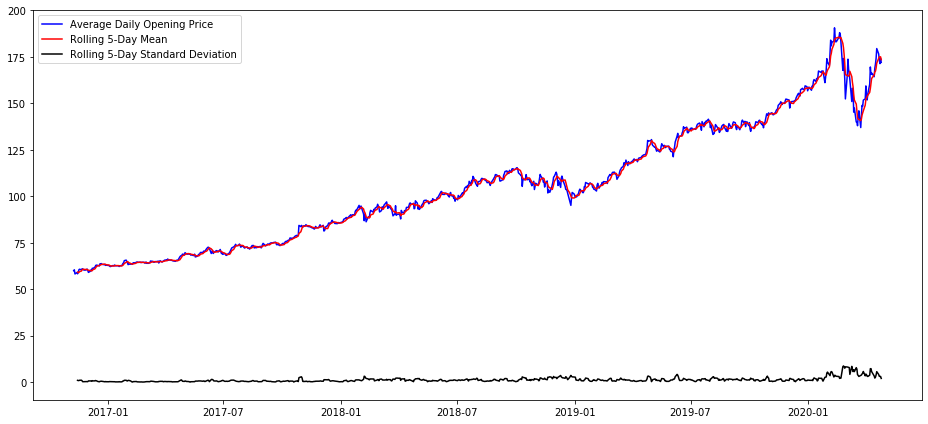

In [19]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df['Open'], color='blue',label='Average Daily Opening Price')
ax.plot(roll_mean, color='red', label='Rolling 5-Day Mean')
ax.plot(roll_std, color='black', label='Rolling 5-Day Standard Deviation')
ax.legend()
fig.tight_layout()

In [20]:
adfuller(df['Open'])

(0.012555673655344603,
 0.9595581961756452,
 21,
 847,
 {'1%': -3.438094071905401,
  '5%': -2.8649583643817227,
  '10%': -2.568590208277287},
 3579.4710185401564)

In [21]:
decomposed = decompose(df['Open'].values, 'additive', m=20)

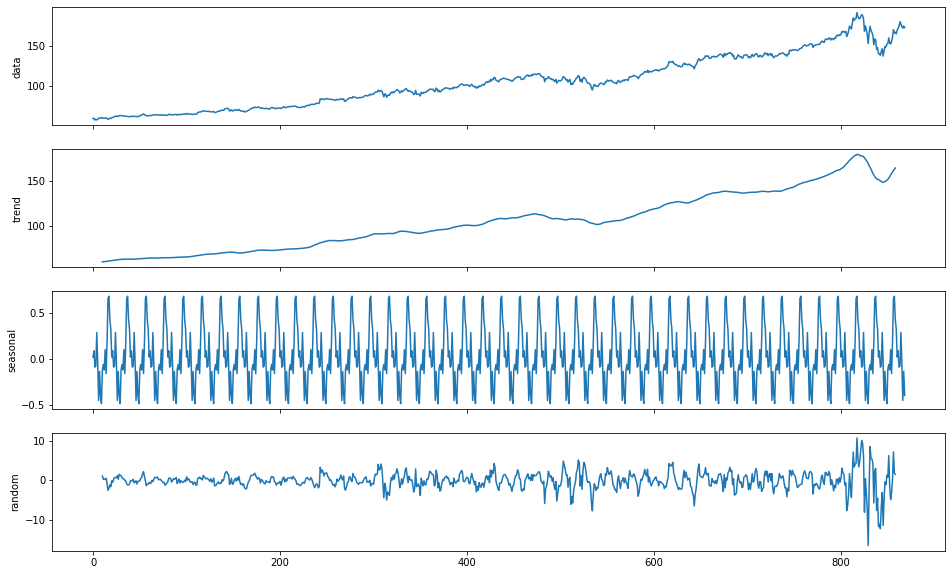

In [22]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

In [24]:
df_daily_diff = df['Open'].diff()

In [25]:
diff_roll_mean = df_daily_diff.rolling(window=5, center=False).mean()
diff_roll_std = df_daily_diff.rolling(window=5, center=False).std()

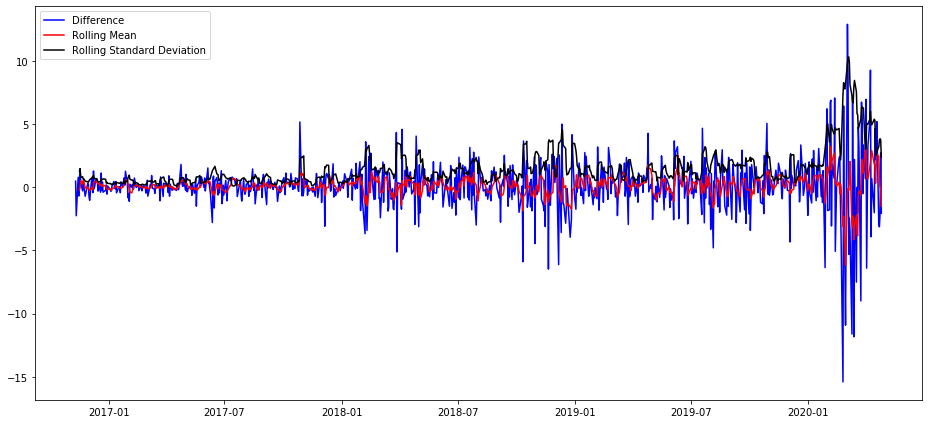

In [27]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_daily_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [29]:
logged_daily = np.log1p(df['Open'])

In [30]:
log_roll_mean = logged_daily.rolling(window=5, center=False).mean()
log_roll_std = logged_daily.rolling(window=5, center=False).std()

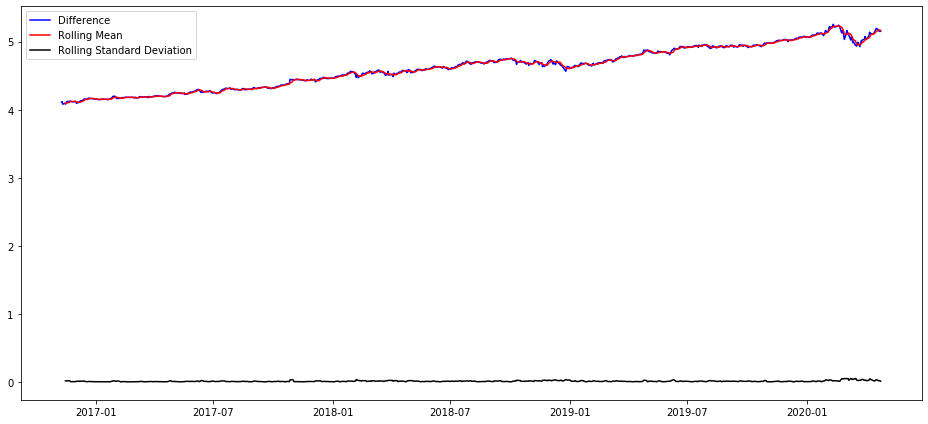

In [31]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_daily, color='blue',label='Difference')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [32]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['DoW'] = df.index.dayofweek

In [33]:
df['Test'] = (df.Year >= 2019).astype(np.int)
df.head(3).append(df.tail(3))

,Open,High,Low,Close,Adj Close,Volume,Year,Month,DoW,Test
Date,,,,,,,,,,
2016-11-09,60.000000,60.590000,59.200001,60.169998,56.474503,49632500,2016,11,2,0
2016-11-10,60.480000,60.490002,57.630001,58.700001,55.094799,57822400,2016,11,3,0
2016-11-11,58.230000,59.119999,58.009998,59.020000,55.395142,38767800,2016,11,4,0
2020-04-22,171.389999,174.000000,170.820007,173.520004,173.520004,34651600,2020,4,2,1
2020-04-23,174.110001,175.059998,170.910004,171.419998,171.419998,32790800,2020,4,3,1
2020-04-24,172.059998,174.559998,170.710007,174.550003,174.550003,34277600,2020,4,4,1


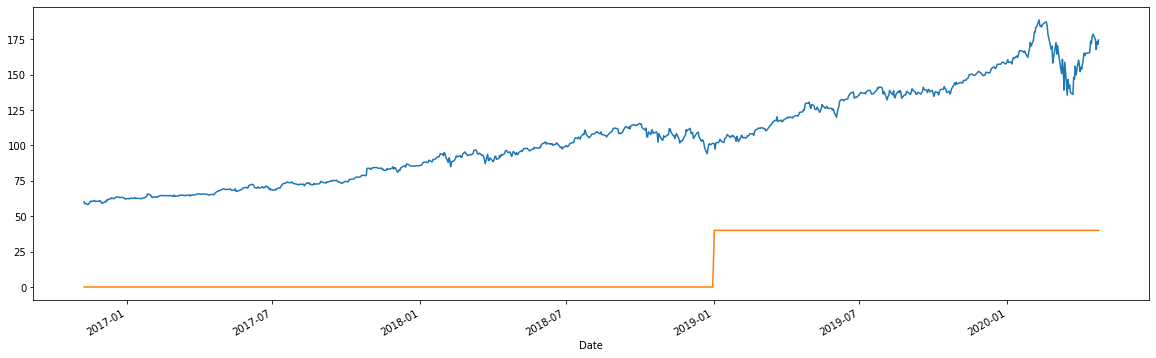

In [34]:
SIZE=(20,6)

plt.figure(figsize=SIZE)
df.Close.plot()
(40*df.Test).plot()
plt.show()

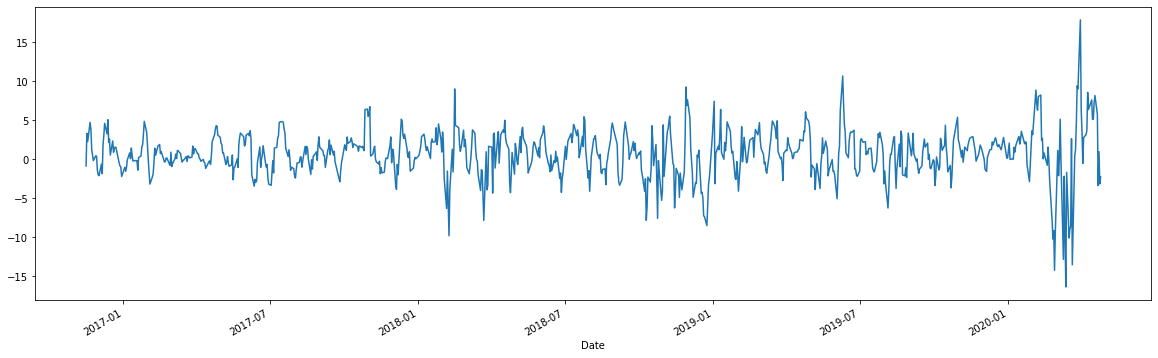

In [35]:
days = 5
data = 100*df.Close.pct_change(days).dropna()

plt.figure(figsize=SIZE)
data.plot()
plt.show()

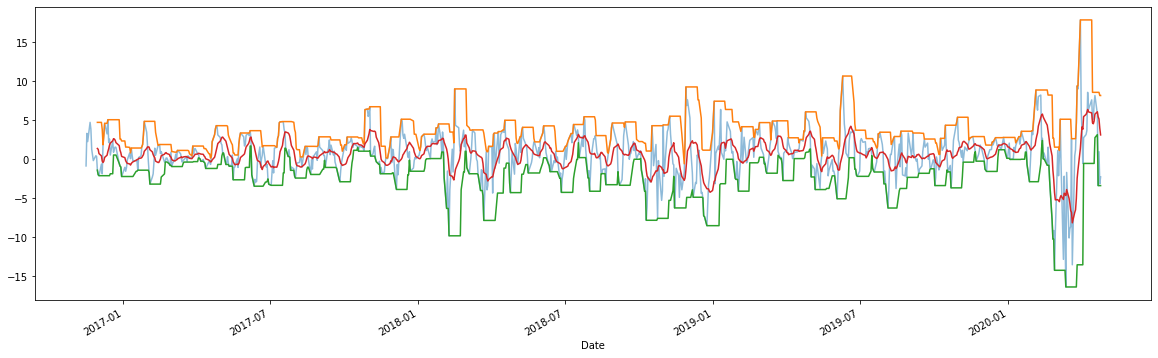

In [36]:
plt.figure(figsize=SIZE)
data.plot(alpha=0.5)
data.rolling(10).max().plot()
data.rolling(10).min().plot()
data.rolling(10).mean().plot()
plt.show()

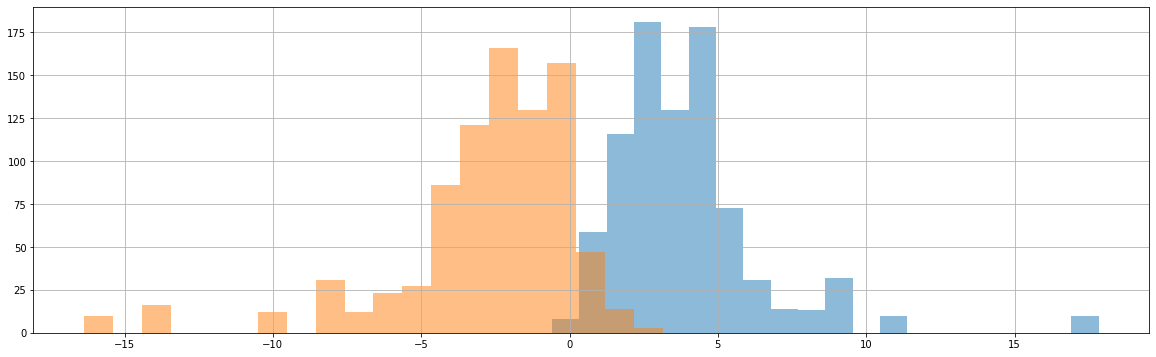

In [37]:
plt.figure(figsize=SIZE)
data.rolling(10).max().hist(bins=20, alpha=0.5)
data.rolling(10).min().hist(bins=20, alpha=0.5)
plt.show()

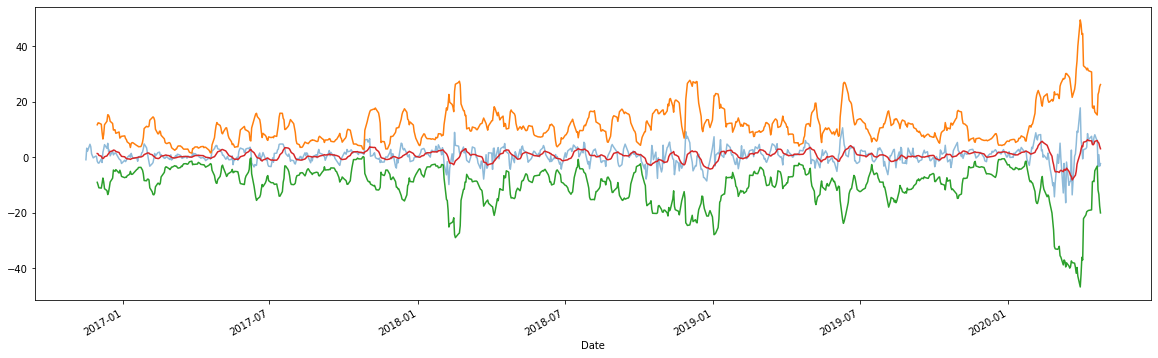

In [38]:
mu_t = data.rolling(10).mean()
sigma_t = data.rolling(10).std()

plt.figure(figsize=SIZE)
data.plot(alpha=0.5)
(mu_t + 5*sigma_t).plot()
(mu_t - 5*sigma_t).plot()
mu_t.plot()
plt.show()

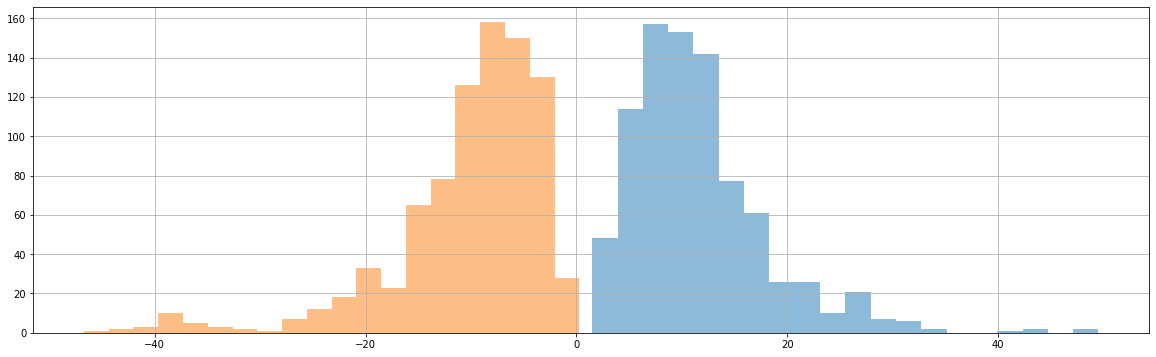

In [39]:
plt.figure(figsize=SIZE)
(mu_t + 5*sigma_t).hist(bins=20, alpha=0.5)
(mu_t - 5*sigma_t).hist(bins=20, alpha=0.5)
plt.show()

# ARIMA

In [42]:
train, test = data[df.Test==0], data[df.Test==1]

dickey = ADFTest(alpha=0.05, k=None)
dickey.should_diff(train)

(0.01, False)

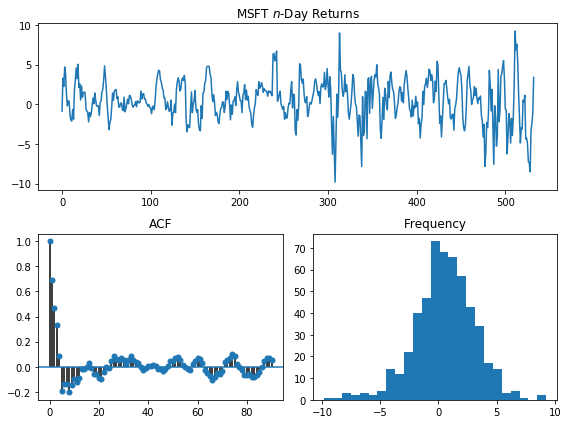

In [43]:
tsdisplay(train, lag_max=90, title="MSFT $n$-Day Returns", show=True)

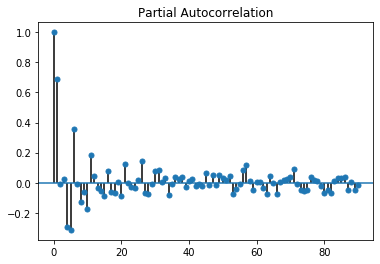

In [44]:
plot_pacf(train, lags=90)
plt.show()

In [45]:
arima = auto_arima(train, max_order=50, maxiter=100, random_state=42,
                   start_p=1, start_q=1, max_p=12, max_q=12, 
                   seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore')

In [46]:
preds, conf_int = arima.predict(n_periods=10, return_conf_int=True)

print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test[:10], preds)))
print("Test MAE: %.3f" % mean_absolute_error(test[:10], preds))

Test RMSE: 3.001
Test MAE: 2.168


# ARCH

In [47]:
am = arch_model(train, vol='ARCH')
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     28,   Neg. LLF: 1193.3912407480686
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1193.390759175669
            Iterations: 8
            Function evaluations: 43
            Gradient evaluations: 8
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -1193.39
Distribution:                  Normal   AIC:                           2392.78
Method:            Maximum Likelihood   BIC:                           2405.62
                                        No. Observations:                  533
Date:                Sat, Apr 25 2020   Df Residuals:                      530
Time:                        20:53:49   Df Model:                            3
        

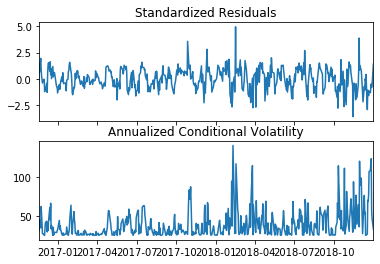

In [48]:
fig = res.plot(annualize='D')

# GARCH

In [49]:
am = arch_model(train, vol='GARCH')
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1177.9610479881705
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1177.2005950589814
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1177.200520810654
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -1177.20
Distribution:                  Normal   AIC:                           2362.40
Method:            Maximum Likelihood   BIC:                           2379.52
                                        No. Observations:                  533
Date:                Sat, Apr 25 2020   Df Residuals:                      529
Time:       

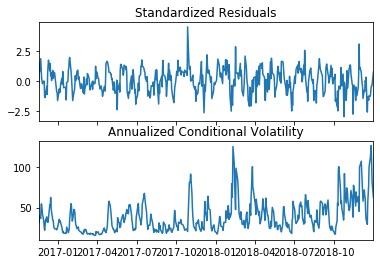

In [50]:
fig = res.plot(annualize='D')

In [51]:
am = arch_model(train, vol='GARCH', o=1)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1177.852340659418
Iteration:     10,   Func. Count:     80,   Neg. LLF: 1176.825934902124
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1176.8258004001232
            Iterations: 12
            Function evaluations: 94
            Gradient evaluations: 12
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1176.83
Distribution:                  Normal   AIC:                           2363.65
Method:            Maximum Likelihood   BIC:                           2385.04
                                        No. Observations:                  533
Date:                Sat, Apr 25 2020   Df Residuals:                      528
Time:        

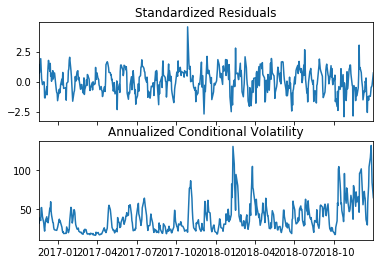

In [52]:
fig = res.plot(annualize='D')

# EGARCH

In [53]:
am = arch_model(train, vol='EGARCH')
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     40,   Neg. LLF: 1174.8704300422748
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1174.2547578095134
Iteration:     15,   Func. Count:    103,   Neg. LLF: 1174.2544685633916
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1174.2544671712644
            Iterations: 16
            Function evaluations: 109
            Gradient evaluations: 16
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                     EGARCH   Log-Likelihood:               -1174.25
Distribution:                  Normal   AIC:                           2356.51
Method:            Maximum Likelihood   BIC:                           2373.62
                                        No. Observations:                  533
Date:           

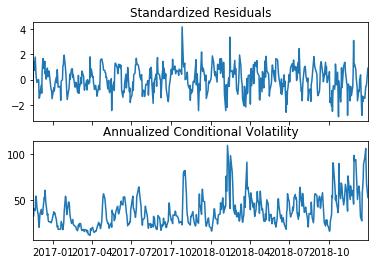

In [54]:
fig = res.plot(annualize='D')

# AVGARCH

In [55]:
am = arch_model(data, vol='GARCH', power=1.0)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1982.4978186849378
Iteration:     10,   Func. Count:     69,   Neg. LLF: 1978.5884727661787
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1978.588414957684
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 12
                    Constant Mean - AVGARCH Model Results                     
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                    AVGARCH   Log-Likelihood:               -1978.59
Distribution:                  Normal   AIC:                           3965.18
Method:            Maximum Likelihood   BIC:                           3984.22
                                        No. Observations:                  864
Date:                Sat, Apr 25 2020   Df Residuals:                      860
Time:       

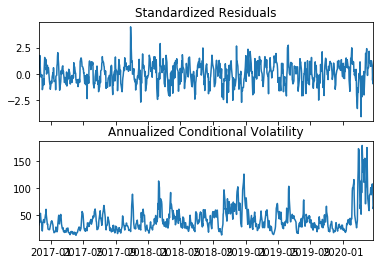

In [56]:
fig = res.plot(annualize='D')

# TGARCH

In [57]:
am = arch_model(train, vol='GARCH', power=1.0, o=1)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     43,   Neg. LLF: 1177.9370263585943
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1177.0308161815756
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1177.0300040415782
            Iterations: 12
            Function evaluations: 97
            Gradient evaluations: 12
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:                  Close   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1177.03
Distribution:                  Normal   AIC:                           2364.06
Method:            Maximum Likelihood   BIC:                           2385.45
                                        No. Observations:                  533
Date:                Sat, Apr 25 2020   Df Residuals:                      528
Time:      

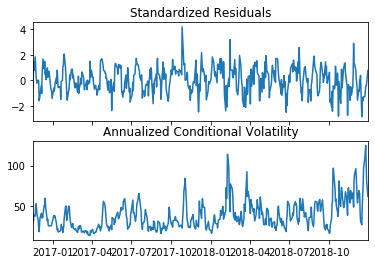

In [58]:
fig = res.plot(annualize='D')

# AR-TGARCH

                           AR - TARCH/ZARCH Model Results                           
Dep. Variable:                        Close   R-squared:                       0.993
Mean Model:                              AR   Adj. R-squared:                  0.993
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -1869.05
Distribution:      Standardized Student's t   AIC:                           3762.10
Method:                  Maximum Likelihood   BIC:                           3812.86
                                              No. Observations:                  508
Date:                      Sat, Apr 25 2020   Df Residuals:                      496
Time:                              21:01:07   Df Model:                           12
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
C

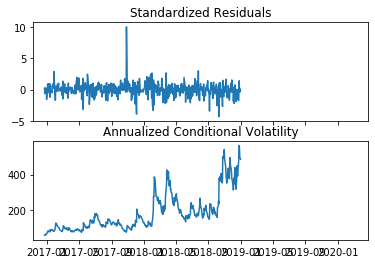

In [59]:
# days = 60
# data = 100*df.Close.pct_change(days).dropna()
data = 10*df.Close

split_date = df[df.Test==1].head(1).index[0]

# We build the model component by component:
#  * Autoregressive Model for the Mean Process,
#  * Change the default distribtuion from Normal to T,
#  * Model the variance with TGARCH.

ar = ARX(data, lags=[1, 3, 5, 10, 20, 30])
# ar = ARX(data, lags=[1, 3, 5, 10, 20, 30, 45, 60, 90, 120, 180])
ar.distribution = StudentsT()
ar.volatility = GARCH(o=1, power=1)

res = ar.fit(disp='off', last_obs=split_date)
print(res.summary())

res.plot(annualize='D')
plt.show()

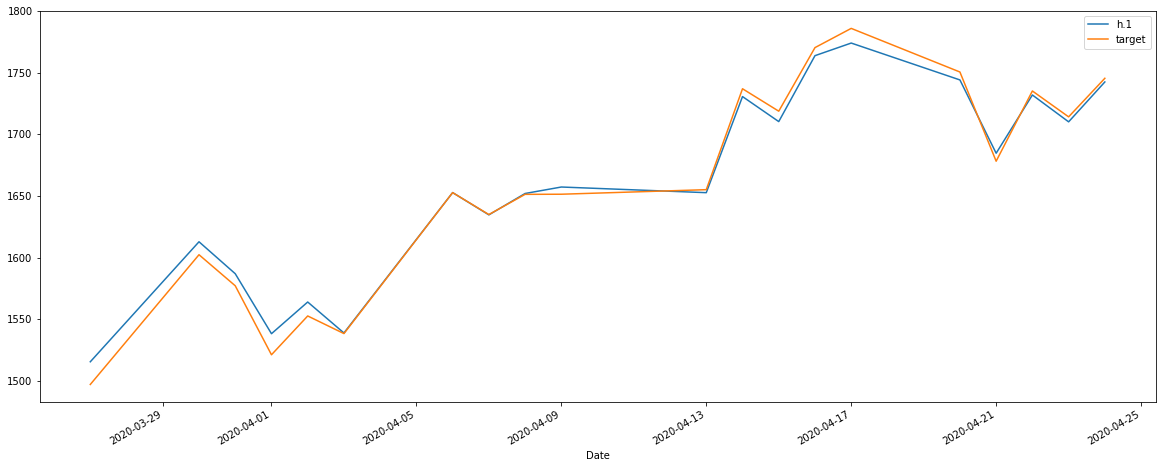

In [60]:
horizon = 1
forecasts = res.forecast(horizon=horizon, start=split_date, method='simulation')

horizons = forecasts.mean
horizons['target'] = data

# horizons[split_date:].plot(figsize=(20,8))
horizons.tail(20).plot(figsize=(20,8))
plt.show()

In [14]:
microsoft=Stocker('MSFT')

MSFT Stocker Initialized. Data covers 1986-03-13 00:00:00 to 2018-03-27 00:00:00.


In [15]:
stock_history=microsoft.stock
stock_history.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09,1986-03-13,0.064720,0.005779
1,1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08,1986-03-14,0.067031,0.002311
2,1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08,1986-03-17,0.068187,0.001156
3,1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07,1986-03-18,0.066454,-0.001734
4,1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07,1986-03-19,0.065298,-0.001156


In [21]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-09,60.000000,60.590000,59.200001,60.169998,56.474503,49632500
2016-11-10,60.480000,60.490002,57.630001,58.700001,55.094799,57822400
2016-11-11,58.230000,59.119999,58.009998,59.020000,55.395142,38767800
2016-11-14,59.020000,59.080002,57.279999,58.119999,54.550411,41328400
2016-11-15,58.330002,59.490002,58.320000,58.869999,55.627632,35904100
...,...,...,...,...,...,...
2020-04-20,176.630005,178.750000,174.990005,175.059998,175.059998,36669600
2020-04-21,173.500000,173.669998,166.110001,167.820007,167.820007,56203700
2020-04-22,171.389999,174.000000,170.820007,173.520004,173.520004,34651600


Object `stocker` not found.
